In [1]:
import numpy as np
from matplotlib import pyplot
from scipy import linalg
import copy
import iMPS
from scipy.sparse import linalg
import funcs
import sys

Wave function deformation

In [46]:
eigs=[]
lam1s=[]
lam2s=[]
lam3s=[]
lam4s=[]
dim1s=[]
dim2s=[]
dim3s=[]

Sa1s = []
Sa2s = []
Sa3s = []
X = np.array([[0,1],[1,0]])
Z = np.array([[1,0],[0,-1]])

T4 = np.zeros([1,1,4,4])
T4[0,0,:,:] = np.kron(X,X)
MPO4 = iMPS.iMPO()
MPO4.construct_from_tensor_list([T4,T4])

B = np.zeros([1,1,4])
B[0,0] =(linalg.expm(0.1*Z)).reshape([4,])
MPS = iMPS.iMPS()
MPS.svd_threshold =1e-10
MPS.max_bond = 15
MPS.construct_from_tensor_list([B,B])



#rng = list(np.arange(0,0.42,0.02))
rng = list(np.arange(0.4,0.5,0.01))
dim = 15
#rng = rng+list(np.arange(0.46,0.8,0.02))
for h in rng:   
    
    h1 = h
    h2 = 0
    
    
    
    trans = funcs.single_trans(h1=h1,h2=h2)
    
    MPO = iMPS.iMPO()
    MPO.construct_from_tensor_list([trans,trans])

    MPS_power2 = iMPS.MPS_power_method_twosite(MPS,MPO,max_bond=dim)
    MPS_power2.update(400,1e-10)
    Sa1s.append(funcs.entropy(MPS_power2.MPS2.s[1]))
    
    strap4 = iMPS.strap(MPS_power2.MPS2,MPO4,MPS_power2.MPS2)
    lam2s.append(strap4.calculate_eig())
    
    MPS_power3 = iMPS.MPS_power_method_twosite(MPS_power2.MPS2,MPO,max_bond=dim)
    MPS_power3.update(100,1e-8)
    Sa2s.append(funcs.entropy(MPS_power3.MPS2.s[1]))
    
    
    strap4 = iMPS.strap(MPS_power3.MPS2,MPO4,MPS_power3.MPS2)
    lam3s.append(strap4.calculate_eig())
    
    
    

    dim1s.append(MPS.chi[1])   
    
    
    """strap4 = iMPS.strap(MPS_power3.MPS2,MPO4,MPS_power3.MPS2)
    lam4s.append(strap4.calculate_eig())"""
    
    dim2s.append(MPS_power2.MPS2.chi[1])
    
    print(f'current h is {h}')


current h is 0.4
current h is 0.41000000000000003
current h is 0.42000000000000004
current h is 0.43000000000000005
current h is 0.44000000000000006
current h is 0.45000000000000007
current h is 0.4600000000000001
current h is 0.4700000000000001
current h is 0.4800000000000001
current h is 0.4900000000000001


In [49]:
lam3s

[(0.9999999999969656+3.697074273241629e-18j),
 (0.9999999999752759-2.9497431797504424e-17j),
 (0.9999999997939762+3.2217378098603143e-18j),
 (0.9999999962081637-1.1761402377351909e-17j),
 (0.9998013496891178-2.1066926312504064e-16j),
 (0.973862067523521-1.3671759598213199e-17j),
 (0.9471669929327473+9.105478663249115e-18j),
 (0.9217054023342132+2.6588106564432068e-17j),
 (0.8971866530016628+6.438216185685761e-18j),
 (0.8732109080393503-1.0271144514666425e-17j)]

Text(0, 0.5, '$\\langle X \\bar{X}\\rangle$')

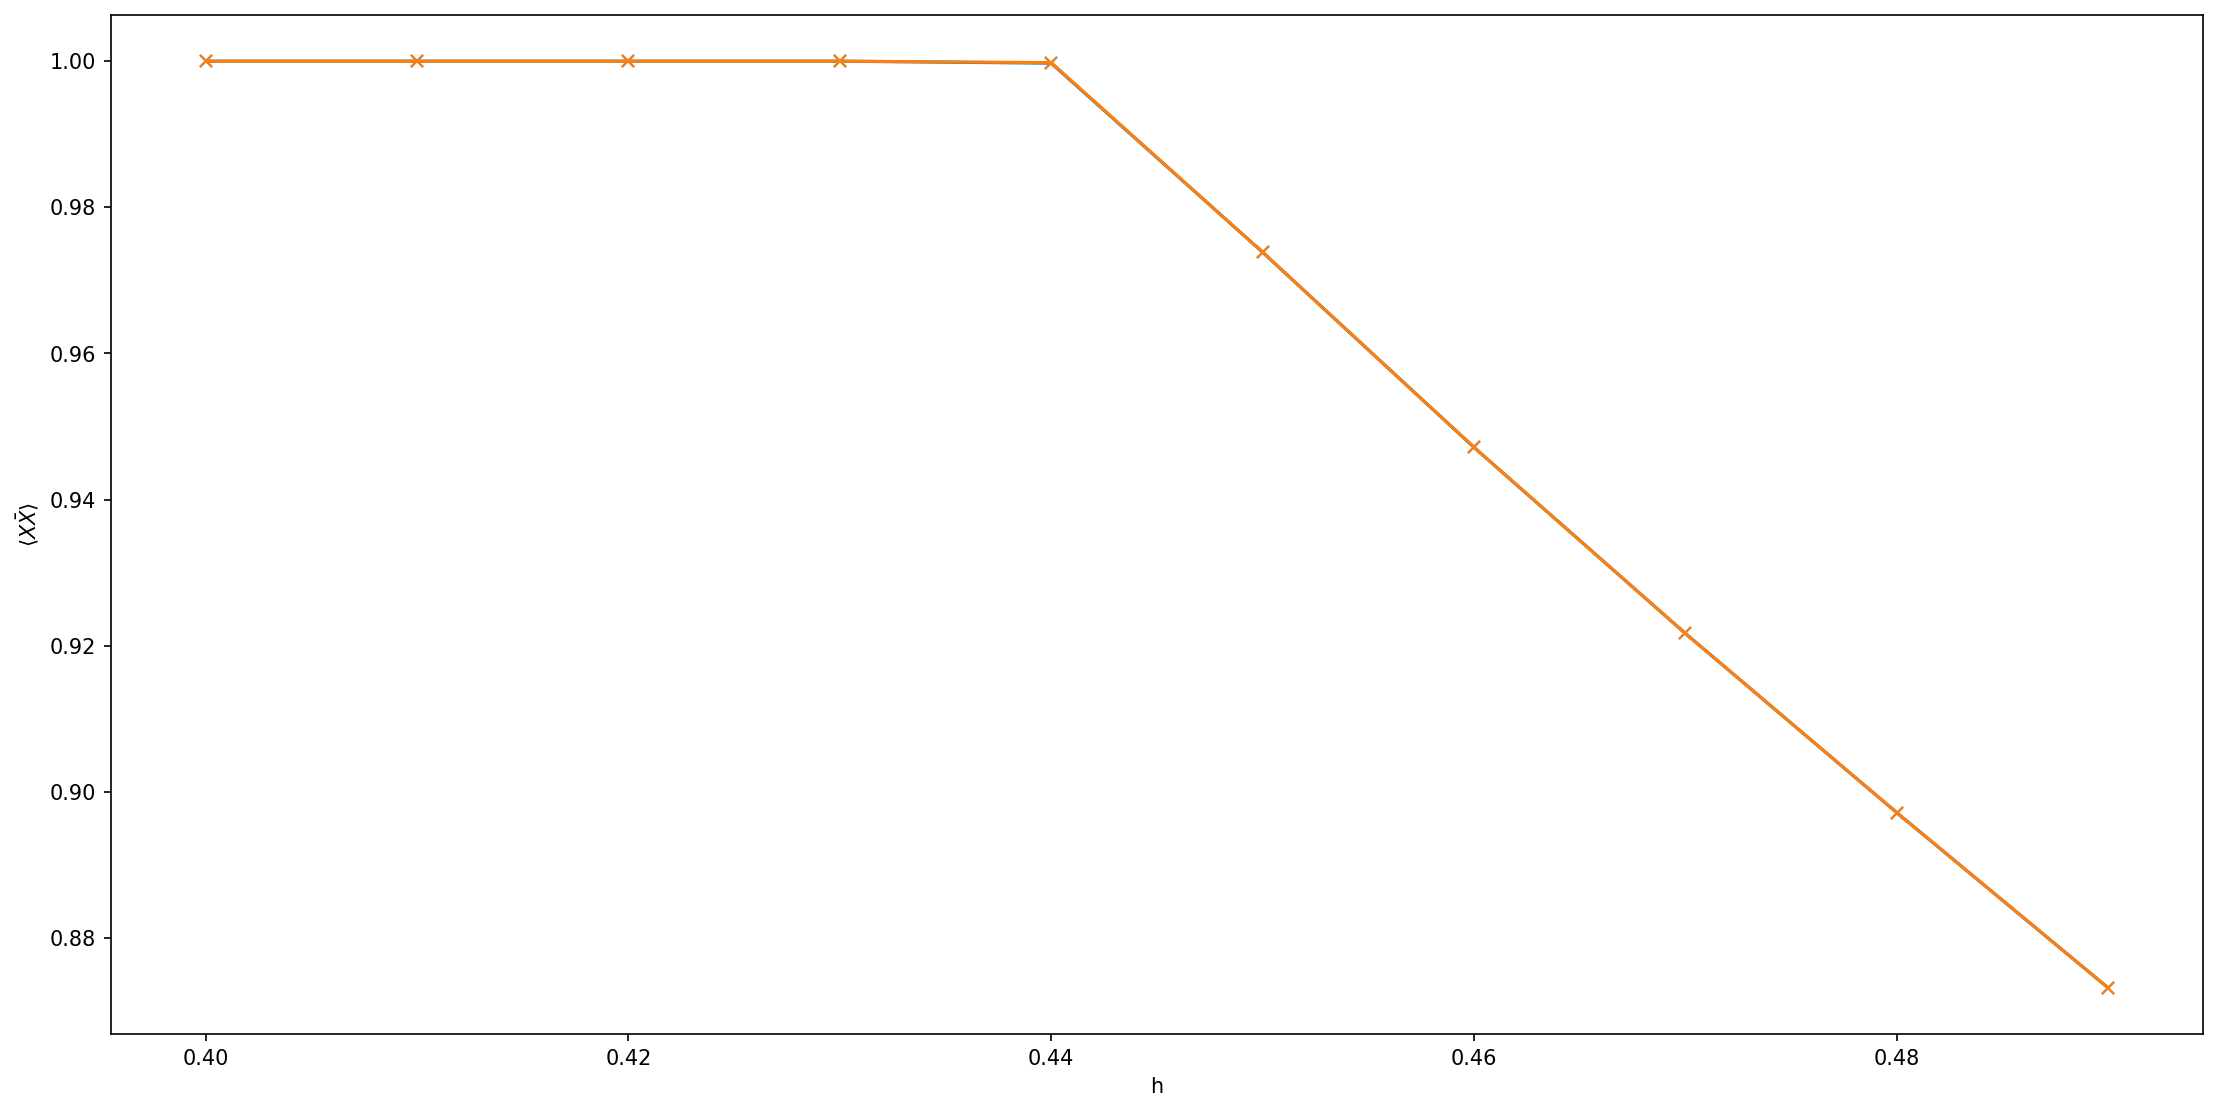

In [51]:
pyplot.figure(figsize=(18,9),dpi=150)
pyplot.plot(rng,np.abs(lam2s),'-x')
pyplot.plot(rng,np.abs(lam3s),'-x')
#pyplot.plot(rng,np.abs(lam4s),'-x')
pyplot.xlabel('h')
pyplot.ylabel('$\langle X \\bar{X}\\rangle$')

ValueError: x and y must have same first dimension, but have shapes (10,) and (0,)

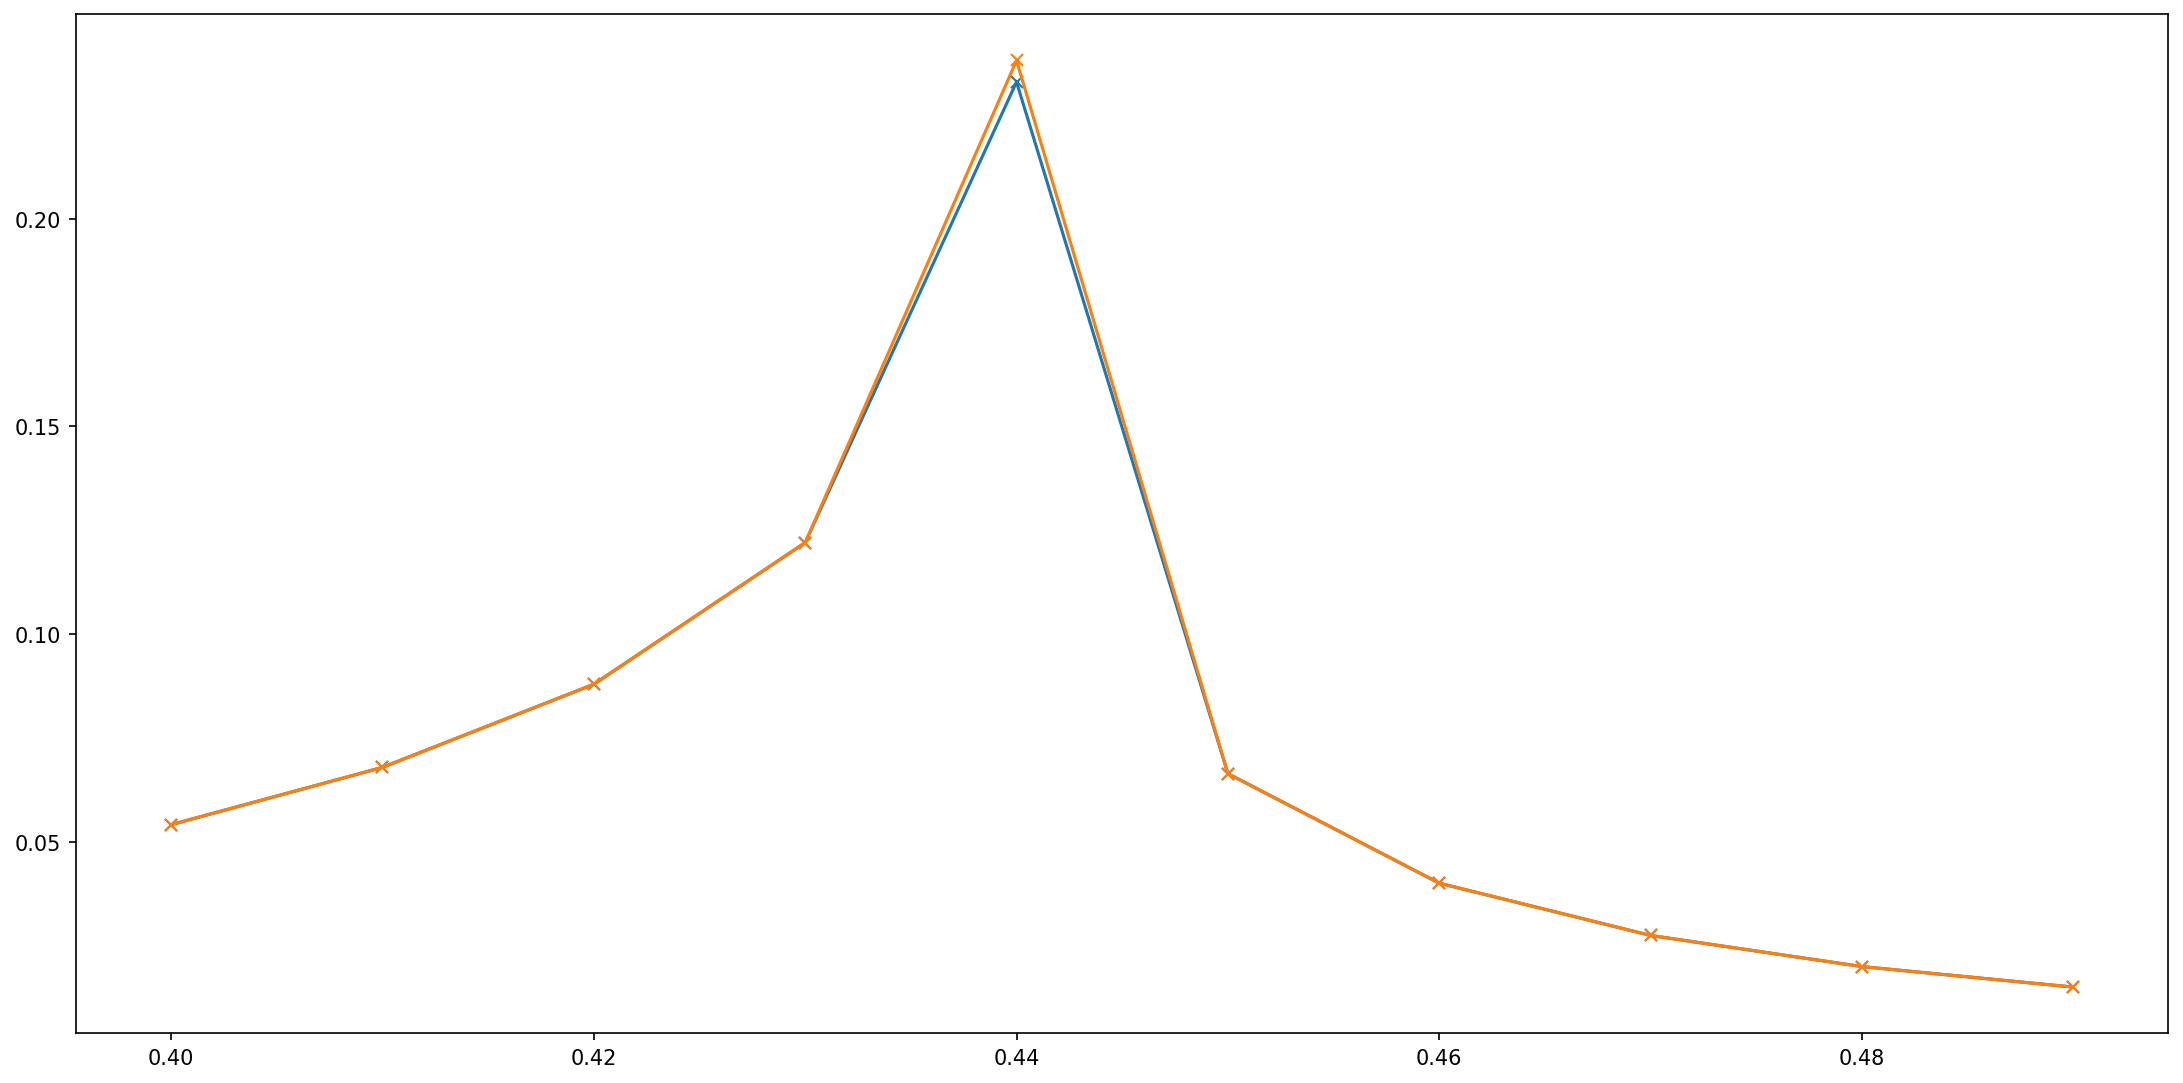

In [52]:
pyplot.figure(figsize=(18,9),dpi=150)
pyplot.plot(rng,Sa1s,'-x')
pyplot.plot(rng,Sa2s,'-x')
pyplot.plot(rng,Sa3s,'-x')

pyplot.xlabel('h')
pyplot.ylabel('$\langle X \\bar{X}\\rangle$')

AKLT ground state

In [2]:
#exact ground state
A = np.zeros([2,2,3]) #spin1 to 2 spin1/2
A[0,0,0] = 1 
A[:,:,1] = np.array([[0,1/np.sqrt(2)],[1/np.sqrt(2),0]])
A[1,1,2] = 1

P0 = np.array([[0,1/np.sqrt(2)],[-1/np.sqrt(2),0]]) # project to spin singlet

AP0 = np.tensordot(A,P0,([1],[0]))
AP0 = np.transpose(AP0,[0,2,1])

MPS2 = iMPS.iMPS()
MPS2.construct_from_tensor_list([AP0,AP0])

In [3]:
#project operator
P2 = np.zeros([9,9])


P2[0,0] = 1
P2[8,8] = 1

v = np.zeros([3,3])
v[1,0]= 1
v[0,1] = 1
v = v/np.linalg.norm(v)
v = v.reshape([9,1])
P2+=v@v.transpose()
v = np.zeros([3,3])

v = np.zeros([3,3])
v[2,1]= 1
v[1,2] = 1
v = v/np.linalg.norm(v)
v = v.reshape([9,1])
P2+=v@v.transpose()
v = np.zeros([3,3])

v[0,2]= 1
v[2,0]= 1
v[1,1] = 2
v = v/np.linalg.norm(v)
v = v.reshape([9,1])
P2+=v@v.transpose()



In [4]:
np.linalg.norm(P2-P2@P2)

4.577566798522237e-16

In [5]:
delta = 0.1 # time interval
U = -2/3*np.eye(9)+2*P2
M = linalg.expm(-delta*U)

In [6]:
T = np.reshape(M,[3,3,3,3])
T = np.transpose(T,[0,2,1,3])
T = np.reshape(T,[9,9])

u,s,v = np.linalg.svd(T)

In [7]:
M1 = np.reshape(u@np.diag(s),[3,3,9])
M2 = np.reshape(v,[9,3,3])

trans1 = np.tensordot(M1,M2,([1],[1]))
trans1 = np.transpose(trans1,[2,1,0,3])

trans2 = np.tensordot(M2,M1,([2],[0]))
trans2 = np.transpose(trans2,[0,3,1,2])


In [8]:
MPO = iMPS.iMPO()
MPO.construct_from_tensor_list([trans1,trans2])

In [9]:
Z3= np.array([1,0.5,-0.3])
B = np.zeros([1,1,3])
B[0,0] =(np.exp(0.1*Z3)).reshape([3,])
MPS = iMPS.iMPS()
MPS.svd_threshold =1e-10
MPS.max_bond = 10
MPS.construct_from_tensor_list([B,B])

In [18]:
MPS_power2 = iMPS.MPS_power_method_twosite(MPS,MPO,max_bond=10)
MPS_power2.update(100,1e-6)
strap = iMPS.strap(MPS_power2.MPS2,None,MPS2)
abs(strap.calculate_eig())

0.9999946994031718